In [1]:
import numpy as np

file_path = 'diabetes_scale.txt'  # Replace with the correct file path

X = []  # List to store feature vectors
y = []  # List to store labels

# Open and read the file
with open(file_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        try:
            label = int(parts[0])  # First value is the label
            features = [0] * 8  # Assuming there are 8 features
            for item in parts[1:]:
                index, value = item.split(':')
                features[int(index) - 1] = float(value)
            X.append(features)
            y.append(label)
        except Exception as e:
            print(f"Error in line: {line}. Error: {e}")

# Convert lists to numpy arrays for further processing
X = np.array(X)
y = np.array(y)

# Check for empty data rows and print the count
empty_rows = np.sum(np.all(X == 0, axis=1))
print(f"Number of empty rows in features: {empty_rows}")

# Check for labels without features
empty_labels = np.sum(np.all(y == 0))
print(f"Number of empty labels: {empty_labels}")

# Print the first 5 rows to inspect the loaded data
print("First 5 rows of feature matrix (X):")
print(X[:5])

print("\nFirst 5 labels (y):")
print(y[:5])

print(X.shape,y.shape)

Number of empty rows in features: 0
Number of empty labels: 0
First 5 rows of feature matrix (X):
[[-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141   -1.         -0.207153
  -0.766866   -0.666667  ]
 [-0.0588235   0.839196    0.0491803  -1.         -1.         -0.305514
  -0.492741   -0.633333  ]
 [-0.882353   -0.105528    0.0819672  -0.535354   -0.777778   -0.162444
  -0.923997   -1.        ]
 [-1.          0.376884   -0.344262   -0.292929   -0.602837    0.28465
   0.887276   -0.6       ]]

First 5 labels (y):
[-1  1 -1  1 -1]
(768, 8) (768,)


Starting training for Learning Rate: 0.1, Epochs: 100
Learning Rate: 0.1, Epoch [20/100], Loss: 0.6088
Learning Rate: 0.1, Epoch [40/100], Loss: 0.5914
Learning Rate: 0.1, Epoch [60/100], Loss: 0.5812
Learning Rate: 0.1, Epoch [80/100], Loss: 0.5725
Learning Rate: 0.1, Epoch [100/100], Loss: 0.5649
Test Accuracy: 66.88% for Learning Rate: 0.1, Epochs: 100
Starting training for Learning Rate: 0.1, Epochs: 500
Learning Rate: 0.1, Epoch [20/500], Loss: 0.6531
Learning Rate: 0.1, Epoch [40/500], Loss: 0.6292
Learning Rate: 0.1, Epoch [60/500], Loss: 0.6148
Learning Rate: 0.1, Epoch [80/500], Loss: 0.6025
Learning Rate: 0.1, Epoch [100/500], Loss: 0.5917
Learning Rate: 0.1, Epoch [120/500], Loss: 0.5823
Learning Rate: 0.1, Epoch [140/500], Loss: 0.5739
Learning Rate: 0.1, Epoch [160/500], Loss: 0.5665
Learning Rate: 0.1, Epoch [180/500], Loss: 0.5599
Learning Rate: 0.1, Epoch [200/500], Loss: 0.5540
Learning Rate: 0.1, Epoch [220/500], Loss: 0.5487
Learning Rate: 0.1, Epoch [240/500], Loss:

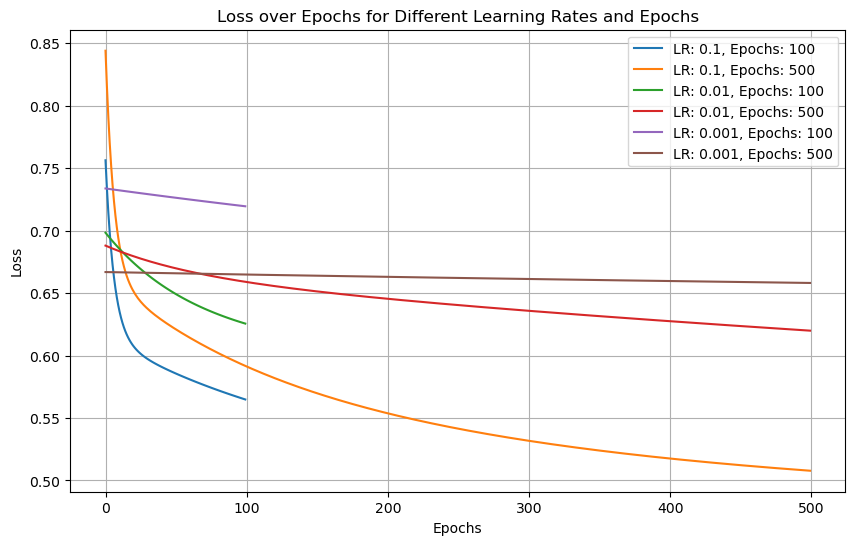

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Convert lists to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Perceptron model using PyTorch
class Perceptron(nn.Module):
    def __init__(self, n_features):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(n_features, 1)  # Linear layer with one output (for binary classification)
    
    def forward(self, x):
        out = self.linear(x)
        return torch.sigmoid(out)  # Use sigmoid to map the output to (0, 1)

# Function to train and record loss for visualization
def train_perceptron(learning_rate, n_iters):
    model = Perceptron(n_features=X_train.shape[1])
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Set learning rate
    
    losses = []  # List to store loss for each epoch
    
    # Training loop
    for epoch in range(n_iters):
        model.train()  # Set the model to training mode
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(X_train).squeeze()
        loss = criterion(outputs, (y_train + 1) / 2)  # Convert y to (0, 1) for binary cross-entropy
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Record the loss for plotting
        losses.append(loss.item())
        
        # Print the loss every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Learning Rate: {learning_rate}, Epoch [{epoch+1}/{n_iters}], Loss: {loss.item():.4f}")

    # Testing and calculating accuracy on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(X_test).squeeze()
        predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
        accuracy = (predicted == (y_test + 1) / 2).float().mean().item()  # Calculate accuracy
        print(f"Test Accuracy: {accuracy * 100:.2f}% for Learning Rate: {learning_rate}, Epochs: {n_iters}")
    
    return losses

# List of learning rates and epochs to test
learning_rates = [0.1, 0.01, 0.001]
epochs = [100, 500]

# Plot settings
plt.figure(figsize=(10, 6))

# Iterate through each learning rate and epoch combination
for lr in learning_rates:
    for n_iter in epochs:
        print(f"Starting training for Learning Rate: {lr}, Epochs: {n_iter}")
        losses = train_perceptron(learning_rate=lr, n_iters=n_iter)
        plt.plot(losses, label=f'LR: {lr}, Epochs: {n_iter}')

# Adding labels and legend to the plot
plt.title("Loss over Epochs for Different Learning Rates and Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Starting training for Learning Rate: 0.1, Epochs: 100
Learning Rate: 0.1, Epoch [20/100], Loss: 0.6599
Learning Rate: 0.1, Epoch [40/100], Loss: 0.6486
Learning Rate: 0.1, Epoch [60/100], Loss: 0.6447
Learning Rate: 0.1, Epoch [80/100], Loss: 0.6430
Learning Rate: 0.1, Epoch [100/100], Loss: 0.6418
Test Accuracy: 64.29% for Learning Rate: 0.1, Epochs: 100
Starting training for Learning Rate: 0.1, Epochs: 500
Learning Rate: 0.1, Epoch [20/500], Loss: 0.6553
Learning Rate: 0.1, Epoch [40/500], Loss: 0.6467
Learning Rate: 0.1, Epoch [60/500], Loss: 0.6429
Learning Rate: 0.1, Epoch [80/500], Loss: 0.6406
Learning Rate: 0.1, Epoch [100/500], Loss: 0.6387
Learning Rate: 0.1, Epoch [120/500], Loss: 0.6366
Learning Rate: 0.1, Epoch [140/500], Loss: 0.6340
Learning Rate: 0.1, Epoch [160/500], Loss: 0.6307
Learning Rate: 0.1, Epoch [180/500], Loss: 0.6264
Learning Rate: 0.1, Epoch [200/500], Loss: 0.6207
Learning Rate: 0.1, Epoch [220/500], Loss: 0.6133
Learning Rate: 0.1, Epoch [240/500], Loss:

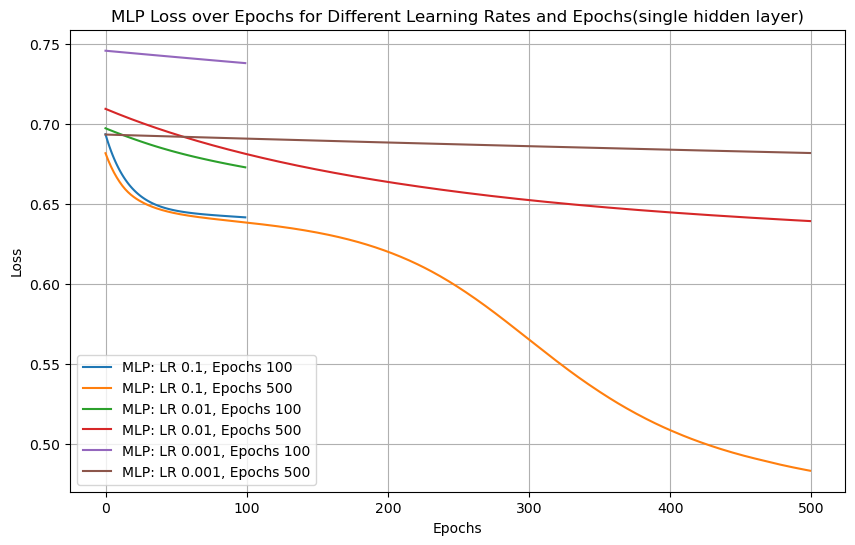

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Convert lists to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model using PyTorch
class MLP(nn.Module):
    def __init__(self, n_features, n_hidden, n_hidden2, n_output):
        super(MLP, self).__init__()
        # Define a MLP with one hidden layer
        self.hidden = nn.Linear(n_features, n_hidden)  # Hidden layer
        self.hidden2 = nn.Linear(n_hidden, n_hidden2)  # Second hidden layer
        self.output = nn.Linear(n_hidden2, n_output)  # Output layer
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Apply ReLU activation on hidden layer
        x = torch.relu(self.hidden2(x))  # Apply Rely activation on secound hidden layer
        x = torch.sigmoid(self.output(x))  # Apply Sigmoid activation on output
        return x

# Function to train and record loss for visualization and printing every 50 epochs
def train_mlp(learning_rate, n_iters, n_hidden, n_hidden2):
    model = MLP(n_features=X_train.shape[1], n_hidden=n_hidden, n_hidden2=n_hidden2, n_output=1)
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Set learning rate
    
    losses = []  # List to store loss for each epoch
    
    # Training loop
    for epoch in range(n_iters):
        model.train()  # Set the model to training mode
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(X_train).squeeze()
        loss = criterion(outputs, (y_train + 1) / 2)  # Convert y to (0, 1) for binary cross-entropy
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Record the loss for plotting
        losses.append(loss.item())
        
        # Print the loss every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Learning Rate: {learning_rate}, Epoch [{epoch+1}/{n_iters}], Loss: {loss.item():.4f}")

    # Testing and calculating accuracy on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(X_test).squeeze()
        predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
        accuracy = (predicted == (y_test + 1) / 2).float().mean().item()  # Calculate accuracy
        print(f"Test Accuracy: {accuracy * 100:.2f}% for Learning Rate: {learning_rate}, Epochs: {n_iters}")
    
    return losses

# List of learning rates and epochs to test
learning_rates = [0.1, 0.01, 0.001]
epochs = [100, 500]
n_hidden = 10  # Number of neurons in the hidden layer
n_hidden2 = 5 # Number of neurons in the second hidden layer

# Plot settings
plt.figure(figsize=(10, 6))

# Iterate through each learning rate and epoch combination
for lr in learning_rates:
    for n_iter in epochs:
        print(f"Starting training for Learning Rate: {lr}, Epochs: {n_iter}")
        losses = train_mlp(learning_rate=lr, n_iters=n_iter, n_hidden=n_hidden, n_hidden2=n_hidden2)
        plt.plot(losses, label=f'MLP: LR {lr}, Epochs {n_iter}')

# Adding labels and legend to the plot
plt.title("MLP Loss over Epochs for Different Learning Rates and Epochs(single hidden layer)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Starting training for Learning Rate: 0.1, Epochs: 100
Learning Rate: 0.1, Epoch [20/100], Loss: 0.6401
Learning Rate: 0.1, Epoch [40/100], Loss: 0.6300
Learning Rate: 0.1, Epoch [60/100], Loss: 0.6231
Learning Rate: 0.1, Epoch [80/100], Loss: 0.6147
Learning Rate: 0.1, Epoch [100/100], Loss: 0.6043
Test Accuracy: 64.94% for Learning Rate: 0.1, Epochs: 100
Starting training for Learning Rate: 0.1, Epochs: 500
Learning Rate: 0.1, Epoch [20/500], Loss: 0.6430
Learning Rate: 0.1, Epoch [40/500], Loss: 0.6216
Learning Rate: 0.1, Epoch [60/500], Loss: 0.6125
Learning Rate: 0.1, Epoch [80/500], Loss: 0.6042
Learning Rate: 0.1, Epoch [100/500], Loss: 0.5955
Learning Rate: 0.1, Epoch [120/500], Loss: 0.5865
Learning Rate: 0.1, Epoch [140/500], Loss: 0.5773
Learning Rate: 0.1, Epoch [160/500], Loss: 0.5682
Learning Rate: 0.1, Epoch [180/500], Loss: 0.5596
Learning Rate: 0.1, Epoch [200/500], Loss: 0.5514
Learning Rate: 0.1, Epoch [220/500], Loss: 0.5433
Learning Rate: 0.1, Epoch [240/500], Loss:

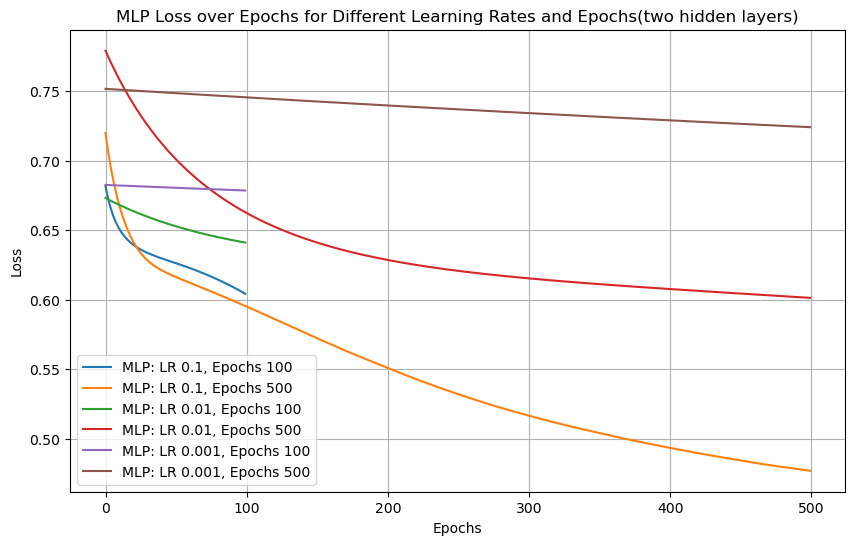

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Convert lists to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model using PyTorch
class MLP(nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(MLP, self).__init__()
        # Define a MLP with one hidden layer
        self.hidden = nn.Linear(n_features, n_hidden)  # Hidden layer
        self.output = nn.Linear(n_hidden, n_output)  # Output layer
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Apply ReLU activation on hidden layer
        x = torch.sigmoid(self.output(x))  # Apply Sigmoid activation on output
        return x

# Function to train and record loss for visualization and printing every 50 epochs
def train_mlp(learning_rate, n_iters, n_hidden):
    model = MLP(n_features=X_train.shape[1], n_hidden=n_hidden, n_output=1)
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Set learning rate
    
    losses = []  # List to store loss for each epoch
    
    # Training loop
    for epoch in range(n_iters):
        model.train()  # Set the model to training mode
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(X_train).squeeze()
        loss = criterion(outputs, (y_train + 1) / 2)  # Convert y to (0, 1) for binary cross-entropy
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Record the loss for plotting
        losses.append(loss.item())
        
        # Print the loss every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Learning Rate: {learning_rate}, Epoch [{epoch+1}/{n_iters}], Loss: {loss.item():.4f}")

    # Testing and calculating accuracy on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(X_test).squeeze()
        predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
        accuracy = (predicted == (y_test + 1) / 2).float().mean().item()  # Calculate accuracy
        print(f"Test Accuracy: {accuracy * 100:.2f}% for Learning Rate: {learning_rate}, Epochs: {n_iters}")
    
    return losses

# List of learning rates and epochs to test
learning_rates = [0.1, 0.01, 0.001]
epochs = [100, 500]
n_hidden = 10  # Number of neurons in the hidden layer (you can adjust this as needed)

# Plot settings
plt.figure(figsize=(10, 6))

# Iterate through each learning rate and epoch combination
for lr in learning_rates:
    for n_iter in epochs:
        print(f"Starting training for Learning Rate: {lr}, Epochs: {n_iter}")
        losses = train_mlp(learning_rate=lr, n_iters=n_iter, n_hidden=n_hidden)
        plt.plot(losses, label=f'MLP: LR {lr}, Epochs {n_iter}')

# Adding labels and legend to the plot
plt.title("MLP Loss over Epochs for Different Learning Rates and Epochs(two hidden layers)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Training SLP with LR=0.1, Epochs=500
SLP: Learning Rate: 0.1, Epoch [20/500], Loss: 0.6213
SLP: Learning Rate: 0.1, Epoch [40/500], Loss: 0.6014
SLP: Learning Rate: 0.1, Epoch [60/500], Loss: 0.5889
SLP: Learning Rate: 0.1, Epoch [80/500], Loss: 0.5784
SLP: Learning Rate: 0.1, Epoch [100/500], Loss: 0.5692
SLP: Learning Rate: 0.1, Epoch [120/500], Loss: 0.5611
SLP: Learning Rate: 0.1, Epoch [140/500], Loss: 0.5541
SLP: Learning Rate: 0.1, Epoch [160/500], Loss: 0.5478
SLP: Learning Rate: 0.1, Epoch [180/500], Loss: 0.5423
SLP: Learning Rate: 0.1, Epoch [200/500], Loss: 0.5374
SLP: Learning Rate: 0.1, Epoch [220/500], Loss: 0.5329
SLP: Learning Rate: 0.1, Epoch [240/500], Loss: 0.5290
SLP: Learning Rate: 0.1, Epoch [260/500], Loss: 0.5254
SLP: Learning Rate: 0.1, Epoch [280/500], Loss: 0.5221
SLP: Learning Rate: 0.1, Epoch [300/500], Loss: 0.5191
SLP: Learning Rate: 0.1, Epoch [320/500], Loss: 0.5164
SLP: Learning Rate: 0.1, Epoch [340/500], Loss: 0.5139
SLP: Learning Rate: 0.1, Epoch [

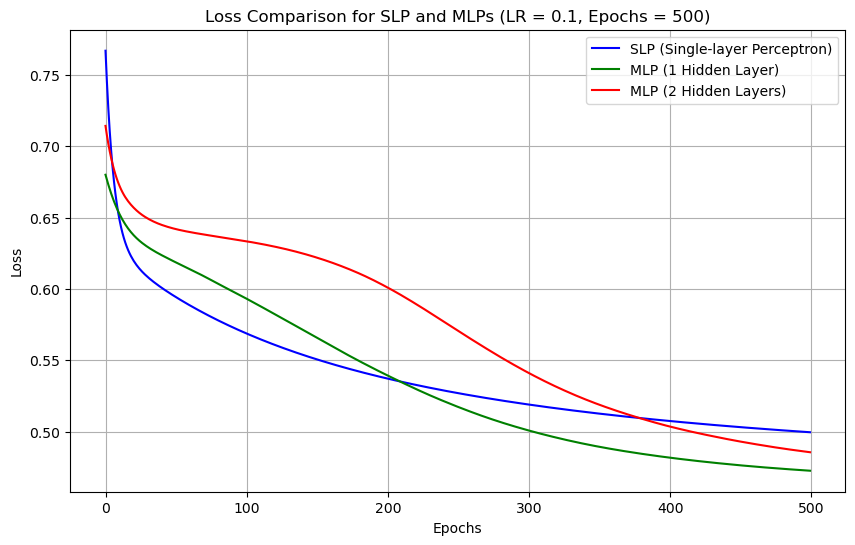

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load and process the dataset
file_path = 'diabetes_scale.txt'  # Replace with the correct file path

X = []  # List to store feature vectors
y = []  # List to store labels

# Open and read the file
with open(file_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        try:
            label = int(parts[0])  # First value is the label
            features = [0] * 8  # Assuming there are 8 features
            for item in parts[1:]:
                index, value = item.split(':')
                features[int(index) - 1] = float(value)
            X.append(features)
            y.append(label)
        except Exception as e:
            print(f"Error in line: {line}. Error: {e}")

# Convert lists to numpy arrays for further processing
X = np.array(X)
y = np.array(y)

# Convert lists to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Perceptron model (SLP)
class Perceptron(nn.Module):
    def __init__(self, n_features):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(n_features, 1)  # Linear layer with one output (binary classification)
    
    def forward(self, x):
        out = self.linear(x)
        return torch.sigmoid(out)  # Sigmoid activation for binary classification

# Define the MLP model (1 hidden layer)
class MLP1(nn.Module):
    def __init__(self, n_features, n_hidden):
        super(MLP1, self).__init__()
        self.hidden = nn.Linear(n_features, n_hidden)  # Hidden layer
        self.output = nn.Linear(n_hidden, 1)  # Output layer
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # ReLU activation on hidden layer
        x = torch.sigmoid(self.output(x))  # Sigmoid activation on output layer
        return x

# Define the MLP model (2 hidden layers)
class MLP2(nn.Module):
    def __init__(self, n_features, n_hidden, n_hidden2):
        super(MLP2, self).__init__()
        self.hidden1 = nn.Linear(n_features, n_hidden)  # First hidden layer
        self.hidden2 = nn.Linear(n_hidden, n_hidden2)  # Second hidden layer
        self.output = nn.Linear(n_hidden2, 1)  # Output layer
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))  # ReLU activation on first hidden layer
        x = torch.relu(self.hidden2(x))  # ReLU activation on second hidden layer
        x = torch.sigmoid(self.output(x))  # Sigmoid activation on output layer
        return x

# Function to train Perceptron (SLP)
def train_perceptron(learning_rate, n_iters):
    model = Perceptron(n_features=X_train.shape[1])
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    losses = []
    for epoch in range(n_iters):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train).squeeze()
        loss = criterion(outputs, (y_train + 1) / 2)  # Convert y to (0, 1) for BCE loss
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        if (epoch + 1) % 20 == 0:
            print(f"SLP: Learning Rate: {learning_rate}, Epoch [{epoch+1}/{n_iters}], Loss: {loss.item():.4f}")

    return losses

# Function to train MLP with 1 hidden layer
def train_mlp1(learning_rate, n_iters, n_hidden):
    model = MLP1(n_features=X_train.shape[1], n_hidden=n_hidden)
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    losses = []
    for epoch in range(n_iters):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train).squeeze()
        loss = criterion(outputs, (y_train + 1) / 2)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        if (epoch + 1) % 20 == 0:
            print(f"MLP (1 Hidden Layer): Learning Rate: {learning_rate}, Epoch [{epoch+1}/{n_iters}], Loss: {loss.item():.4f}")

    return losses

# Function to train MLP with 2 hidden layers
def train_mlp2(learning_rate, n_iters, n_hidden, n_hidden2):
    model = MLP2(n_features=X_train.shape[1], n_hidden=n_hidden, n_hidden2=n_hidden2)
    criterion = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    losses = []
    for epoch in range(n_iters):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train).squeeze()
        loss = criterion(outputs, (y_train + 1) / 2)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        if (epoch + 1) % 20 == 0:
            print(f"MLP (2 Hidden Layers): Learning Rate: {learning_rate}, Epoch [{epoch+1}/{n_iters}], Loss: {loss.item():.4f}")

    return losses

# Start training and plot the results

# Train Perceptron (SLP)
print("Training SLP with LR=0.1, Epochs=500")
slp_losses = train_perceptron(learning_rate=0.1, n_iters=500)

# Train MLP (1 hidden layer)
print("Training MLP (1 hidden layer) with LR=0.1, Epochs=500")
mlp_1_hidden_losses = train_mlp1(learning_rate=0.1, n_iters=500, n_hidden=10)

# Train MLP (2 hidden layers)
print("Training MLP (2 hidden layers) with LR=0.1, Epochs=500")
mlp_2_hidden_losses = train_mlp2(learning_rate=0.1, n_iters=500, n_hidden=10, n_hidden2=5)

# Plot all losses on the same figure
plt.figure(figsize=(10, 6))

# Plot SLP losses
plt.plot(slp_losses, label='SLP (Single-layer Perceptron)', color='blue')

# Plot MLP (1 hidden layer) losses
plt.plot(mlp_1_hidden_losses, label='MLP (1 Hidden Layer)', color='green')

# Plot MLP (2 hidden layers) losses
plt.plot(mlp_2_hidden_losses, label='MLP (2 Hidden Layers)', color='red')

# Add title, labels, and legend
plt.title("Loss Comparison for SLP and MLPs (LR = 0.1, Epochs = 500)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
